In [170]:
#-------------Brief Summary----------#
# We are getting data from yahoo sports to analzye the quarterbacks from the big 12 conference for the 2021 season.


# Import Libraries needed for this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [171]:
# Read in the data from the webpage yahoo sports using pandas library

df = pd.read_html("https://sports.yahoo.com/ncaaf/stats/individual/?sortStatId=PASSING_YARDS&selectedTable=0&leagueStructure=ncaaf.struct.div.1.conf.71")

# The read_html function returns a list object, containing dataframe objects 
# Iterate through each table in the webpage
# Only one table on this webpage

for idx, table in enumerate(df):
    print("Table "+str(idx))
    print(table)

Table 0
                  Player  Team   G   QBRat  Comp  Att    Pct   Yds  PasY/G  \
0            Brock Purdy   ISU  13   149.0   292  407   71.7  3188   245.2   
1           Jarret Doege   WVU  13   135.9   272  417   65.2  3048   234.5   
2        Spencer Sanders  OKST  13   133.5   243  392   62.0  2839   218.4   
3          Gerry Bohanon   BAY  12   146.6   173  275   62.9  2200   183.3   
4         Casey Thompson   TEX  12   154.7   165  261   63.2  2113   176.1   
5        Skylar Thompson   KSU  10   158.9   162  233   69.5  2103   210.3   
6             Max Duggan   TCU  10   157.6   145  227   63.9  2048   204.8   
7         Caleb Williams    OU  11   169.7   136  211   64.5  1915   174.1   
8        Spencer Rattler    OU   9   155.3   141  188   75.0  1484   164.9   
9          Henry Colombi   TTU   7   141.6    96  149   64.4  1291   184.4   
10            Jason Bean    KU  10   118.1   102  182   56.0  1252   125.2   
11         Donovan Smith   TTU   9   146.3    85  139   

In [172]:
# Lets choose the first and only table, that would be the zero index of our list
# We need to do this to access dataframe functionality
df = df[0] 

#Let's perview the data to only view the first 5 rows

df.head()

# plt.style.use('ggplot')

,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
0,Brock Purdy,ISU,13,149.0,292,407,71.7,3188,245.2,7.8,19,8,21,-131
1,Jarret Doege,WVU,13,135.9,272,417,65.2,3048,234.5,7.3,19,12,35,-252
2,Spencer Sanders,OKST,13,133.5,243,392,62.0,2839,218.4,7.2,20,12,15,-97
3,Gerry Bohanon,BAY,12,146.6,173,275,62.9,2200,183.3,8.0,18,7,9,-62
4,Casey Thompson,TEX,12,154.7,165,261,63.2,2113,176.1,8.1,24,9,16,-97


In [173]:
# Gives number of rows

count_row = df.shape[0]
print("Total Rows: " + str(count_row))

# Remove duplicate records

df.drop_duplicates()


# Get new row count
count_row = df.shape[0]
print("Total Rows: " + str(count_row))


Total Rows: 40
Total Rows: 40


In [174]:
# Let's see if there is any missing data in our table

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Player - 0.0%
Team - 0.0%
G - 0.0%
QBRat - 0.0%
Comp - 0.0%
Att - 0.0%
Pct - 0.0%
Yds - 0.0%
PasY/G - 0.0%
Y/A - 0.0%
TD - 0.0%
Int - 0.0%
Sacks - 0.0%
YdsL - 0.0%


In [175]:
# Data types for our columns

df.dtypes

Player     object
Team       object
G           int64
QBRat      object
Comp        int64
Att         int64
Pct        object
Yds         int64
PasY/G    float64
Y/A        object
TD          int64
Int         int64
Sacks       int64
YdsL        int64
dtype: object

In [176]:
# Need to clean up our data types, decimals should be floats data type
# However we need to remove string values from a couple columns first

df = df.replace(['-'],'0')
df

,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
0,Brock Purdy,ISU,13,149.0,292,407,71.7,3188,245.2,7.8,19,8,21,-131
1,Jarret Doege,WVU,13,135.9,272,417,65.2,3048,234.5,7.3,19,12,35,-252
2,Spencer Sanders,OKST,13,133.5,243,392,62.0,2839,218.4,7.2,20,12,15,-97
3,Gerry Bohanon,BAY,12,146.6,173,275,62.9,2200,183.3,8.0,18,7,9,-62
4,Casey Thompson,TEX,12,154.7,165,261,63.2,2113,176.1,8.1,24,9,16,-97
5,Skylar Thompson,KSU,10,158.9,162,233,69.5,2103,210.3,9.0,12,4,18,-134
6,Max Duggan,TCU,10,157.6,145,227,63.9,2048,204.8,9.0,16,6,20,-142
7,Caleb Williams,OU,11,169.7,136,211,64.5,1915,174.1,9.1,21,4,20,-121
8,Spencer Rattler,OU,9,155.3,141,188,75.0,1484,164.9,7.9,11,5,13,-62
9,Henry Colombi,TTU,7,141.6,96,149,64.4,1291,184.4,8.7,5,5,9,-57


In [177]:
# Update column types

df['QBRat'] = df['QBRat'].astype('float64') 
df['Pct'] = df['Pct'].astype('float64') 
df['Y/A'] = df['Y/A'].astype('float64') 

# Lets check if it worked
df.dtypes

Player     object
Team       object
G           int64
QBRat     float64
Comp        int64
Att         int64
Pct       float64
Yds         int64
PasY/G    float64
Y/A       float64
TD          int64
Int         int64
Sacks       int64
YdsL        int64
dtype: object

In [178]:
# Lets sort by QB Rating

df.sort_values(by=['QBRat'], ascending=False)

,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
24,Xavier Hutchinson,ISU,12,841.6,1,1,100.0,49,4.1,49.0,1,0,0,0
23,Sam Jackson,TCU,2,746.8,1,1,100.0,77,38.5,77.0,0,0,2,-5
33,Tyquan Thornton,BAY,13,480.4,1,1,100.0,6,0.5,6.0,1,0,1,-11
26,Will Crowder,WVU,2,217.6,2,2,100.0,28,14.0,14.0,0,0,0,0
28,Ralph Rucker,OU,1,184.0,2,2,100.0,20,20.0,10.0,0,0,0,0
30,Mario Williams,OU,10,184.0,1,1,100.0,10,1.0,10.0,0,0,0,0
7,Caleb Williams,OU,11,169.7,136,211,64.5,1915,174.1,9.1,21,4,20,-121
12,Tyler Shough,TTU,4,164.2,64,92,69.6,872,218.0,9.5,6,3,4,-31
5,Skylar Thompson,KSU,10,158.9,162,233,69.5,2103,210.3,9.0,12,4,18,-134
14,Chandler Morris,TCU,4,158.1,50,76,65.8,717,179.3,9.4,3,0,6,-31


In [179]:
#The data does not look correct since there are quarterbacks who only played a few games all season
#Let's filter out any players who played 5 games or less.

# selecting rows based on condition 
df = df[df['G'] >= 5] 

# Lets new row count
count_row = df.shape[0]
print("Total Rows: " + str(count_row))

df

# Brock Purdy from Iowa state has the highest QB Rating

Total Rows: 28


,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
0,Brock Purdy,ISU,13,149.0,292,407,71.7,3188,245.2,7.8,19,8,21,-131
1,Jarret Doege,WVU,13,135.9,272,417,65.2,3048,234.5,7.3,19,12,35,-252
2,Spencer Sanders,OKST,13,133.5,243,392,62.0,2839,218.4,7.2,20,12,15,-97
3,Gerry Bohanon,BAY,12,146.6,173,275,62.9,2200,183.3,8.0,18,7,9,-62
4,Casey Thompson,TEX,12,154.7,165,261,63.2,2113,176.1,8.1,24,9,16,-97
5,Skylar Thompson,KSU,10,158.9,162,233,69.5,2103,210.3,9.0,12,4,18,-134
6,Max Duggan,TCU,10,157.6,145,227,63.9,2048,204.8,9.0,16,6,20,-142
7,Caleb Williams,OU,11,169.7,136,211,64.5,1915,174.1,9.1,21,4,20,-121
8,Spencer Rattler,OU,9,155.3,141,188,75.0,1484,164.9,7.9,11,5,13,-62
9,Henry Colombi,TTU,7,141.6,96,149,64.4,1291,184.4,8.7,5,5,9,-57


In [180]:
#Let's filter out any qb's who really didn't play much or has less than 10 pass attempts

# selecting rows based on condition 
df = df[df['Att'] >= 10] 

# Lets new row count
count_row = df.shape[0]
print("Total Rows: " + str(count_row))

df


Total Rows: 18


,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
0,Brock Purdy,ISU,13,149.0,292,407,71.7,3188,245.2,7.8,19,8,21,-131
1,Jarret Doege,WVU,13,135.9,272,417,65.2,3048,234.5,7.3,19,12,35,-252
2,Spencer Sanders,OKST,13,133.5,243,392,62.0,2839,218.4,7.2,20,12,15,-97
3,Gerry Bohanon,BAY,12,146.6,173,275,62.9,2200,183.3,8.0,18,7,9,-62
4,Casey Thompson,TEX,12,154.7,165,261,63.2,2113,176.1,8.1,24,9,16,-97
5,Skylar Thompson,KSU,10,158.9,162,233,69.5,2103,210.3,9.0,12,4,18,-134
6,Max Duggan,TCU,10,157.6,145,227,63.9,2048,204.8,9.0,16,6,20,-142
7,Caleb Williams,OU,11,169.7,136,211,64.5,1915,174.1,9.1,21,4,20,-121
8,Spencer Rattler,OU,9,155.3,141,188,75.0,1484,164.9,7.9,11,5,13,-62
9,Henry Colombi,TTU,7,141.6,96,149,64.4,1291,184.4,8.7,5,5,9,-57


In [181]:
# Okay so now we have about 18 qb's that played a decent amount all season

#Lets filter down to who were the starters for the majority of the season

filter_list = ['Brock Purdy','Jarret Doege','Spencer Sanders','Gerry Bohanon','Casey Thompson','Skylar Thompson','Max Duggan','Caleb Williams','Donovan Smith']
df = df[df.Player.isin(filter_list)]

df

,Player,Team,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
0,Brock Purdy,ISU,13,149.0,292,407,71.7,3188,245.2,7.8,19,8,21,-131
1,Jarret Doege,WVU,13,135.9,272,417,65.2,3048,234.5,7.3,19,12,35,-252
2,Spencer Sanders,OKST,13,133.5,243,392,62.0,2839,218.4,7.2,20,12,15,-97
3,Gerry Bohanon,BAY,12,146.6,173,275,62.9,2200,183.3,8.0,18,7,9,-62
4,Casey Thompson,TEX,12,154.7,165,261,63.2,2113,176.1,8.1,24,9,16,-97
5,Skylar Thompson,KSU,10,158.9,162,233,69.5,2103,210.3,9.0,12,4,18,-134
6,Max Duggan,TCU,10,157.6,145,227,63.9,2048,204.8,9.0,16,6,20,-142
7,Caleb Williams,OU,11,169.7,136,211,64.5,1915,174.1,9.1,21,4,20,-121
11,Donovan Smith,TTU,9,146.3,85,139,61.2,1181,131.2,8.5,7,2,9,-58


Text(0.5, 1.0, 'Total games played by Team')

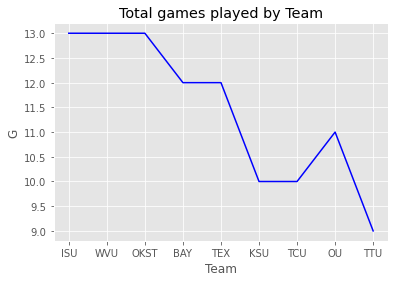

In [182]:
# Games played by starters for each team. ISU, WVU and OKST had the most games played by their starting quaterback(qb).
# TTU has the least. 

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="Team", y="G", data=df, color='b')
plt.title("Total games played by Team")

Text(0.5, 1.0, 'Total passing yards by Team')

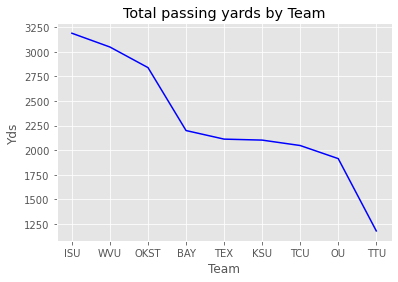

In [183]:
# Total passing yards by each team. Brock Purdy from Iowa State led the big 12 conference in passing yards.

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="Team", y="Yds", data=df, color='b')
plt.title("Total passing yards by Team")

Text(0.5, 1.0, 'Completion Percentage by Team')

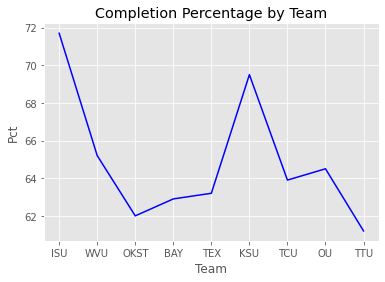

In [184]:
# Completion percentage by team. ISU and KSU led the conference.

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="Team", y="Pct", data=df, color='b')
plt.title("Completion Percentage by Team")

Text(0.5, 1.0, 'Touchdowns by Team')

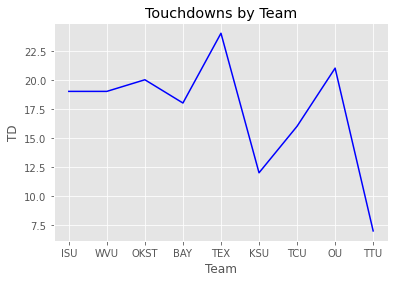

In [185]:
# TD's by team, Casey Thompson lead the big 12 conference despite the team finishing wiht a 5-7 record.

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="Team", y="TD", data=df, color='b')
plt.title("Touchdowns by Team")

Text(0.5, 1.0, 'Interception by Team')

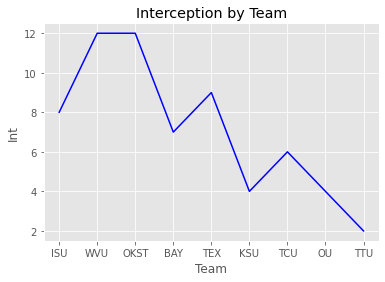

In [186]:
# Interceptions by team. WVU and OKST lead the conference with the most interceptions...

# while TTU starter Dovovan Smith had the least amount

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="Team", y="Int", data=df, color='b')
plt.title("Interception by Team")

Text(0.5, 1.0, 'QBRating vs Completion %')

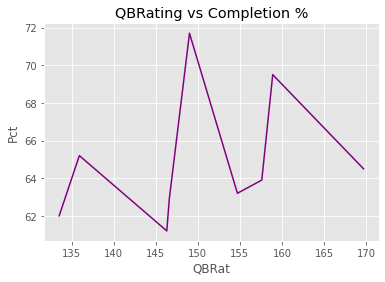

In [187]:
#No correlation between QB Rating and Completion %

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.lineplot(x="QBRat", y="Pct", data=df, color='purple')
plt.title("QBRating vs Completion %")

Text(0.5, 1.0, 'Yards Vs TDs')

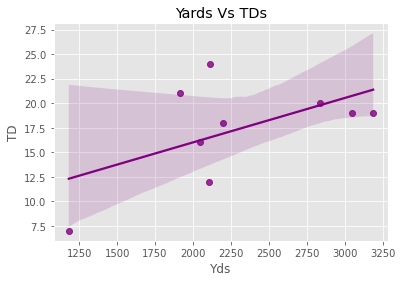

In [188]:
#More passing yards correlates to more touchdowns

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (6,4)
sns.regplot(x="Yds", y="TD", data=df, color='purple')
plt.title("Yards Vs TDs")

<AxesSubplot:>

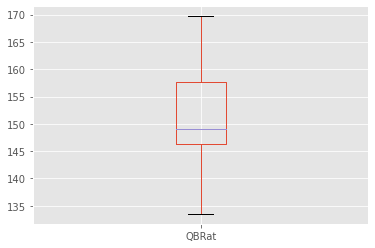

In [189]:


# Are there any Outliers?

df.boxplot(column=['QBRat'])

In [190]:
df.corr(method ='pearson')


,G,QBRat,Comp,Att,Pct,Yds,PasY/G,Y/A,TD,Int,Sacks,YdsL
G,1.000000,-0.521872,0.885444,0.919580,0.201514,0.889715,0.677850,-0.822179,0.758009,0.884708,0.411874,-0.346687
QBRat,-0.521872,1.000000,-0.551756,-0.628769,0.234227,-0.484907,-0.315064,0.900133,0.027398,-0.683928,-0.119042,0.164766
Comp,0.885444,-0.551756,1.000000,0.986768,0.505857,0.989359,0.899645,-0.755275,0.489560,0.803949,0.587960,-0.553272
Att,0.919580,-0.628769,0.986768,1.000000,0.367036,0.981289,0.864597,-0.822770,0.532225,0.880881,0.570370,-0.539787
Pct,0.201514,0.234227,0.505857,0.367036,1.000000,0.502227,0.656897,0.093380,0.035085,-0.027477,0.397344,-0.377942
Yds,0.889715,-0.484907,0.989359,0.981289,0.502227,1.000000,0.932202,-0.702593,0.558961,0.819708,0.609115,-0.575084
PasY/G,0.677850,-0.315064,0.899645,0.864597,0.656897,0.932202,1.000000,-0.457174,0.394453,0.657258,0.661974,-0.659101
Y/A,-0.822179,0.900133,-0.755275,-0.822770,0.093380,-0.702593,-0.457174,1.000000,-0.364464,-0.860242,-0.240935,0.226588
TD,0.758009,0.027398,0.489560,0.532225,0.035085,0.558961,0.394453,-0.364464,1.000000,0.660073,0.327782,-0.223885
Int,0.884708,-0.683928,0.803949,0.880881,-0.027477,0.819708,0.657258,-0.860242,0.660073,1.000000,0.485573,-0.464456


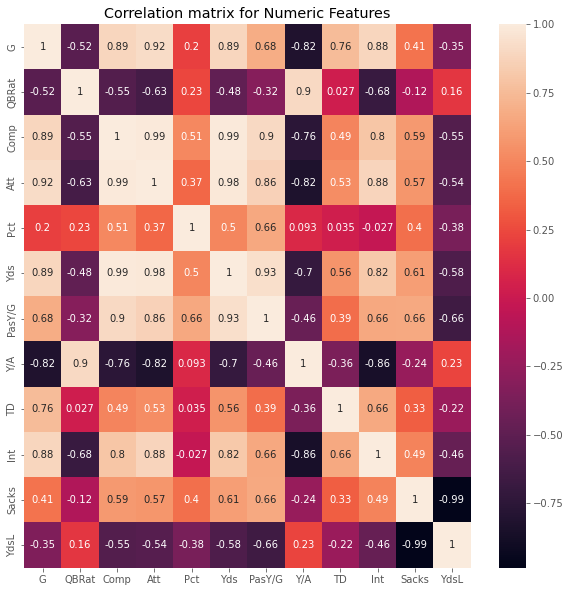

In [195]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

matplotlib.rcParams['figure.figsize'] = (10,10)

plt.title("Correlation matrix for Numeric Features")


plt.show()

In [192]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Player  Player    1.000000
        Team      1.000000
        G         0.961591
        QBRat     1.000000
        Comp      1.000000
                    ...   
YdsL    Y/A       0.954545
        TD        0.967382
        Int       0.928825
        Sacks     0.728652
        YdsL      1.000000
Length: 196, dtype: float64


In [193]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)


G      Sacks     0.648291
Sacks  G         0.648291
YdsL   Sacks     0.728652
Sacks  YdsL      0.728652
       Int       0.765297
                   ...   
Att    Comp      1.000000
       QBRat     1.000000
       Team      1.000000
Comp   PasY/G    1.000000
YdsL   YdsL      1.000000
Length: 196, dtype: float64


In [194]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


G      Sacks     0.648291
Sacks  G         0.648291
YdsL   Sacks     0.728652
Sacks  YdsL      0.728652
       Int       0.765297
                   ...   
Att    Comp      1.000000
       QBRat     1.000000
       Team      1.000000
Comp   PasY/G    1.000000
YdsL   YdsL      1.000000
Length: 196, dtype: float64
